In [1]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [2]:
details_df = pd.read_csv('games_details.csv')


In [3]:
games_df = pd.read_csv('games.csv')


In [4]:
players_df = pd.read_csv('players.csv')


In [5]:
teams_df = pd.read_csv('teams.csv')

In [6]:
details_df.describe(), details_df.shape, details_df.isnull().sum()

(            GAME_ID       TEAM_ID     PLAYER_ID            FGM            FGA  \
 count  5.857940e+05  5.857940e+05  5.857940e+05  491737.000000  491737.000000   
 mean   2.156758e+07  1.610613e+09  2.904877e+05       3.562077       7.859470   
 std    5.634234e+06  8.650943e+00  7.709135e+06       3.007302       5.637177   
 min    1.030000e+07  1.610613e+09  1.500000e+01       0.000000       0.000000   
 25%    2.060060e+07  1.610613e+09  2.400000e+03       1.000000       3.000000   
 50%    2.110053e+07  1.610613e+09  2.007650e+05       3.000000       7.000000   
 75%    2.160035e+07  1.610613e+09  2.027020e+05       5.000000      11.000000   
 max    5.190011e+07  1.610613e+09  1.962938e+09      28.000000      50.000000   
 
               FG_PCT           FG3M           FG3A        FG3_PCT  \
 count  491737.000000  491737.000000  491737.000000  491737.000000   
 mean        0.415208       0.726348       2.042891       0.193526   
 std         0.251511       1.180627       2.46837

In [7]:
#Con la linea anterior podemos ver la descripción del df details, su shape (features) y los valores faltantes

<Axes: >

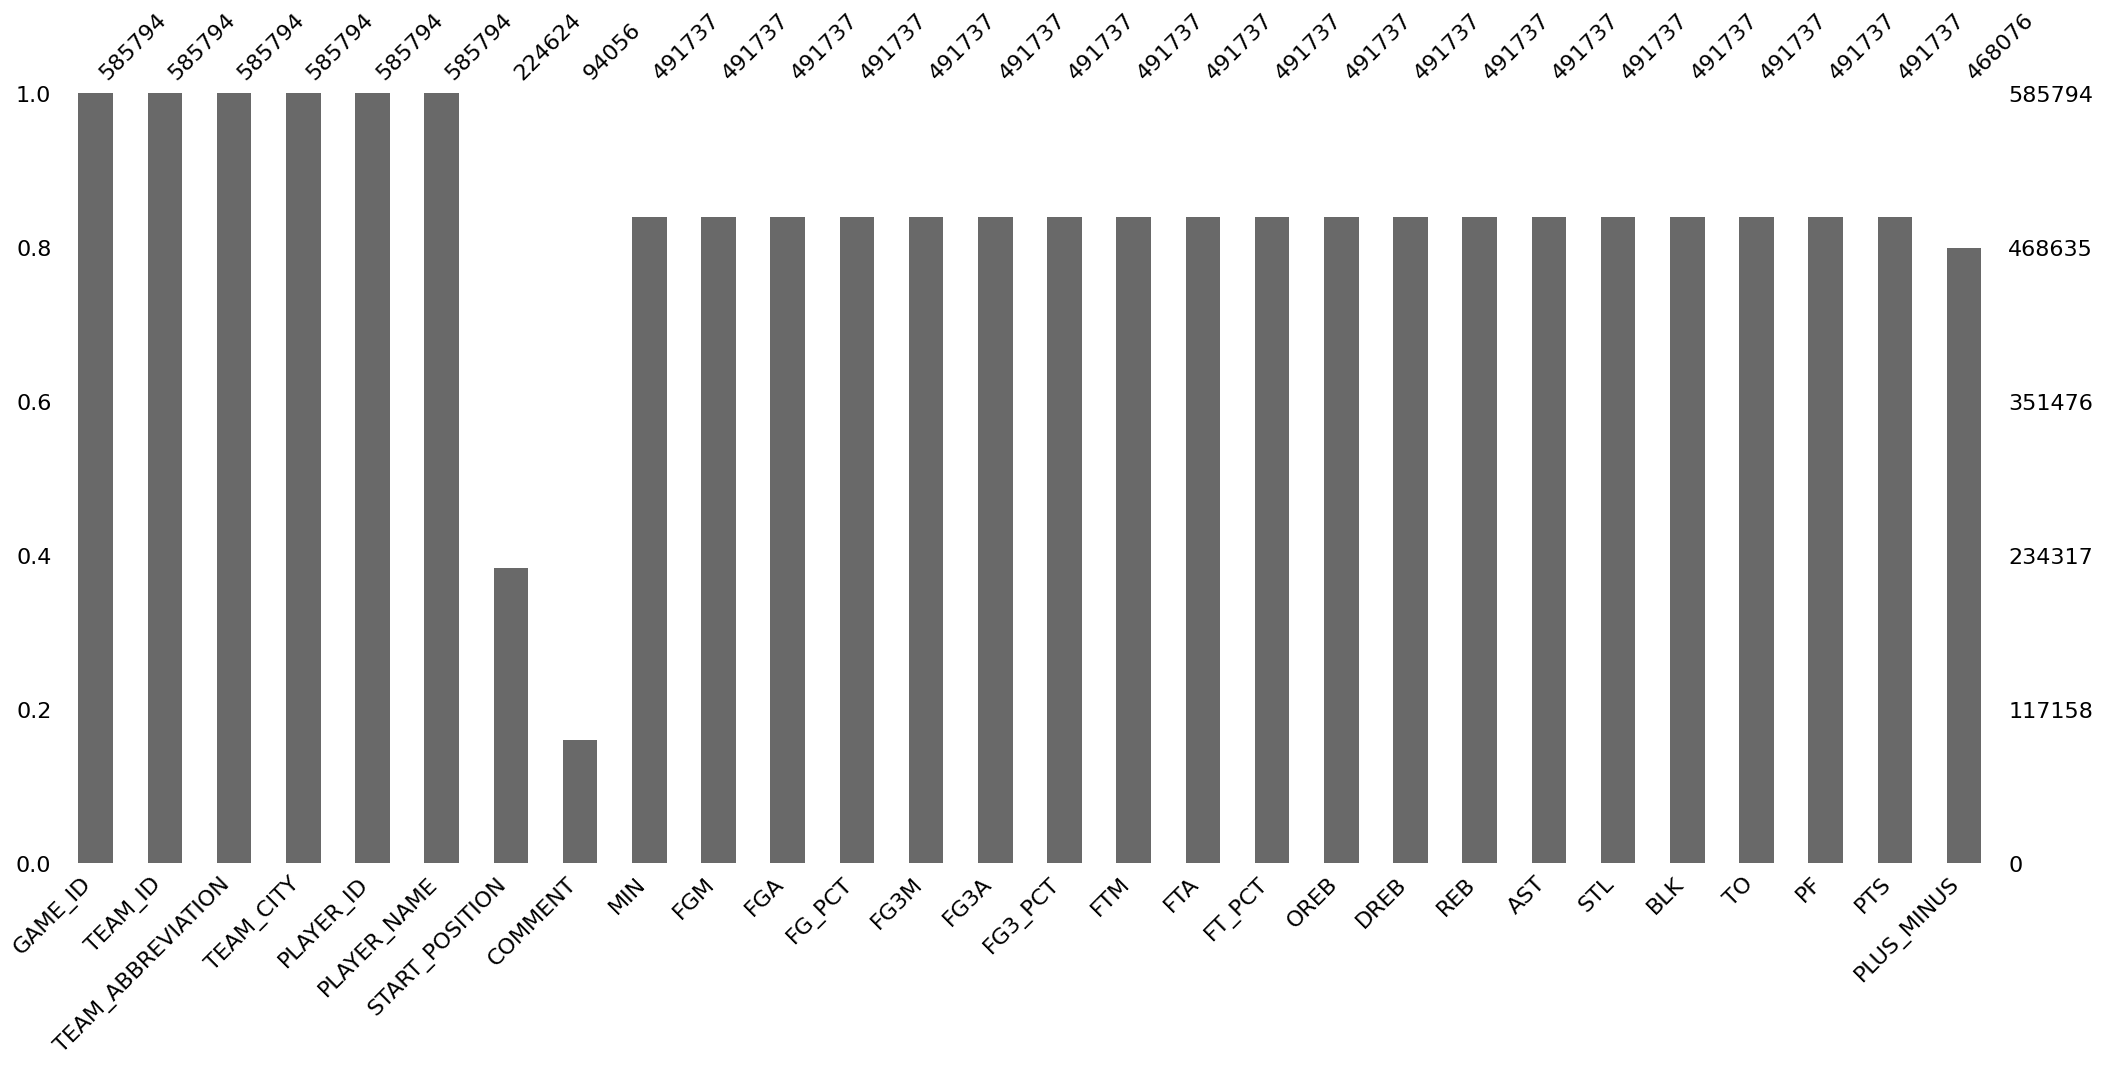

In [8]:
msno.bar(details_df)
#Como pueden ver hay bastantes valores faltantes, tan solo en las columnas "START_POSITION" Y "COMMENT" faltan más de la mitad de los datos.

In [9]:
details_df = details_df.drop(columns=['COMMENT']) # Falta alrededor del 70 % de los datos

In [10]:
#Como estas columnas son valores categoricos que pueden proporcionar insight en los queries, es preferible solo llenarlas con otra clase en este caso "Desconocido"
details_df.fillna(value={'START_POSITION': 'Desconocido'}, inplace=True)
details_df.fillna(value={'MIN': 'Desconocido'}, inplace=True)

In [11]:
nan_cols = details_df.columns[details_df.isna().any()].tolist()

In [12]:
#Los demás valores son númericos, sí es posible usar el metodo de KNNimputer para rellenar los valores aunque tenga mucho costo de computación.
#df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])
details_df[nan_cols] = imputer.fit_transform(details_df[nan_cols])

In [13]:
details_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,12000047,1610612766,CHA,Charlotte,1628998,Cody Martin,F,17:06,0.0,2.0,...,0.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,-31.0
1,12000047,1610612766,CHA,Charlotte,1629023,P.J. Washington,F,24:58,4.0,17.0,...,1.0,6.0,7.0,2.0,2.0,1.0,5.0,3.0,9.0,-2.0
2,12000047,1610612766,CHA,Charlotte,203469,Cody Zeller,C,22:45,5.0,8.0,...,2.0,2.0,4.0,0.0,0.0,1.0,0.0,2.0,13.0,-23.0
3,12000047,1610612766,CHA,Charlotte,1628984,Devonte' Graham,G,31:30,8.0,15.0,...,1.0,3.0,4.0,3.0,2.0,0.0,4.0,0.0,25.0,-7.0
4,12000047,1610612766,CHA,Charlotte,1626179,Terry Rozier,G,26:48,8.0,14.0,...,1.0,4.0,5.0,6.0,1.0,0.0,0.0,2.0,24.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585789,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,Desconocido,19,4.0,9.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,-1.5
585790,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,Desconocido,23,7.0,11.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,11.5
585791,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,Desconocido,15,3.0,7.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,7.0
585792,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,Desconocido,19,1.0,1.0,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,3.0


In [14]:
details_df.isnull().sum()
#Ahora ya no hay valores faltantes.

GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
START_POSITION       0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

In [15]:
games_df.describe(), games_df.shape, games_df.isnull().sum()
#Todos los valores faltantes los llenamos con KNNimputer

(            GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID        SEASON  \
 count  2.352000e+04  2.352000e+04     2.352000e+04  23520.000000   
 mean   2.160579e+07  1.610613e+09     1.610613e+09   2010.958929   
 std    5.579200e+06  8.641796e+00     8.655684e+00      4.893623   
 min    1.030000e+07  1.610613e+09     1.610613e+09   2003.000000   
 25%    2.060059e+07  1.610613e+09     1.610613e+09   2007.000000   
 50%    2.110032e+07  1.610613e+09     1.610613e+09   2011.000000   
 75%    2.160029e+07  1.610613e+09     1.610613e+09   2015.000000   
 max    5.190011e+07  1.610613e+09     1.610613e+09   2020.000000   
 
        TEAM_ID_home      PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home  \
 count  2.352000e+04  23421.000000  23421.000000  23421.000000  23421.000000   
 mean   1.610613e+09    102.283421      0.459854      0.758158      0.355531   
 std    8.641796e+00     12.950092      0.056770      0.100325      0.114312   
 min    1.610613e+09     36.000000      0.250000      0.1

In [16]:
games_df = games_df.drop(columns=['TEAM_ID_home']) #Estas columnas son redundantes
games_df = games_df.drop(columns=['TEAM_ID_away'])

In [17]:
games_df.columns, games_df.dtypes

(Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
        'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
        'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
        'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
        'HOME_TEAM_WINS'],
       dtype='object'),
 GAME_DATE_EST        object
 GAME_ID               int64
 GAME_STATUS_TEXT     object
 HOME_TEAM_ID          int64
 VISITOR_TEAM_ID       int64
 SEASON                int64
 PTS_home            float64
 FG_PCT_home         float64
 FT_PCT_home         float64
 FG3_PCT_home        float64
 AST_home            float64
 REB_home            float64
 PTS_away            float64
 FG_PCT_away         float64
 FT_PCT_away         float64
 FG3_PCT_away        float64
 AST_away            float64
 REB_away            float64
 HOME_TEAM_WINS        int64
 dtype: object)

In [18]:
nan_cols = games_df.columns[games_df.isna().any()].tolist()

In [19]:
games_df[nan_cols] = imputer.fit_transform(games_df[nan_cols])


In [20]:
games_df.isnull().sum() 
#Sin valores faltantes

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [21]:
players_df.describe(), players_df.shape, players_df.isnull().sum()

(            TEAM_ID     PLAYER_ID       SEASON
 count  7.228000e+03  7.228000e+03  7228.000000
 mean   1.610613e+09  2.355862e+06  2014.159934
 std    8.723521e+00  6.106688e+07     3.126216
 min    1.610613e+09  2.440000e+02  2009.000000
 25%    1.610613e+09  2.007680e+05  2012.000000
 50%    1.610613e+09  2.023465e+05  2014.000000
 75%    1.610613e+09  2.039100e+05  2017.000000
 max    1.610613e+09  1.962938e+09  2019.000000,
 (7228, 4),
 PLAYER_NAME    0
 TEAM_ID        0
 PLAYER_ID      0
 SEASON         0
 dtype: int64)

In [22]:
players_df.columns, players_df.dtypes

(Index(['PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON'], dtype='object'),
 PLAYER_NAME    object
 TEAM_ID         int64
 PLAYER_ID       int64
 SEASON          int64
 dtype: object)

In [23]:
teams_df.describe(), teams_df.shape, teams_df.isnull().sum()

(       LEAGUE_ID       TEAM_ID     MIN_YEAR  MAX_YEAR  YEARFOUNDED  \
 count       30.0  3.000000e+01    30.000000      30.0    30.000000   
 mean         0.0  1.610613e+09  1969.700000    2019.0  1969.700000   
 std          0.0  8.803408e+00    16.698441       0.0    16.698441   
 min          0.0  1.610613e+09  1946.000000    2019.0  1946.000000   
 25%          0.0  1.610613e+09  1952.000000    2019.0  1952.000000   
 50%          0.0  1.610613e+09  1970.000000    2019.0  1970.000000   
 75%          0.0  1.610613e+09  1979.000000    2019.0  1979.000000   
 max          0.0  1.610613e+09  2002.000000    2019.0  2002.000000   
 
        ARENACAPACITY  
 count      26.000000  
 mean    18553.307692  
 std      3916.923362  
 min         0.000000  
 25%     18641.500000  
 50%     19131.000000  
 75%     19790.750000  
 max     21711.000000  ,
 (30, 14),
 LEAGUE_ID             0
 TEAM_ID               0
 MIN_YEAR              0
 MAX_YEAR              0
 ABBREVIATION          0
 NICKN

In [24]:
nan_cols = teams_df.columns[teams_df.isna().any()].tolist()
teams_df[nan_cols] = imputer.fit_transform(teams_df[nan_cols])

In [25]:
teams_df.columns, teams_df.dtypes

(Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
        'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
        'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
       dtype='object'),
 LEAGUE_ID               int64
 TEAM_ID                 int64
 MIN_YEAR                int64
 MAX_YEAR                int64
 ABBREVIATION           object
 NICKNAME               object
 YEARFOUNDED             int64
 CITY                   object
 ARENA                  object
 ARENACAPACITY         float64
 OWNER                  object
 GENERALMANAGER         object
 HEADCOACH              object
 DLEAGUEAFFILIATION     object
 dtype: object)

In [26]:
teams_df.isnull().sum() 

LEAGUE_ID             0
TEAM_ID               0
MIN_YEAR              0
MAX_YEAR              0
ABBREVIATION          0
NICKNAME              0
YEARFOUNDED           0
CITY                  0
ARENA                 0
ARENACAPACITY         0
OWNER                 0
GENERALMANAGER        0
HEADCOACH             0
DLEAGUEAFFILIATION    0
dtype: int64

In [ ]:
#Viendo las columnas y sus tipos de datos para la creacion de las tablas

In [81]:
details_df.columns, details_df.dtypes

(Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
        'PLAYER_NAME', 'START_POSITION', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
        'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
        'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
       dtype='object'),
 GAME_ID                int64
 TEAM_ID                int64
 TEAM_ABBREVIATION     object
 TEAM_CITY             object
 PLAYER_ID              int64
 PLAYER_NAME           object
 START_POSITION        object
 MIN                   object
 FGM                  float64
 FGA                  float64
 FG_PCT               float64
 FG3M                 float64
 FG3A                 float64
 FG3_PCT              float64
 FTM                  float64
 FTA                  float64
 FT_PCT               float64
 OREB                 float64
 DREB                 float64
 REB                  float64
 AST                  float64
 STL                  float64
 BLK                  

In [82]:
games_df.columns, games_df.dtypes

(Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
        'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
        'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
        'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
        'HOME_TEAM_WINS'],
       dtype='object'),
 GAME_DATE_EST        object
 GAME_ID               int64
 GAME_STATUS_TEXT     object
 HOME_TEAM_ID          int64
 VISITOR_TEAM_ID       int64
 SEASON                int64
 PTS_home            float64
 FG_PCT_home         float64
 FT_PCT_home         float64
 FG3_PCT_home        float64
 AST_home            float64
 REB_home            float64
 PTS_away            float64
 FG_PCT_away         float64
 FT_PCT_away         float64
 FG3_PCT_away        float64
 AST_away            float64
 REB_away            float64
 HOME_TEAM_WINS        int64
 dtype: object)

In [84]:
players_df.columns, players_df.dtypes

(Index(['PLAYER_NAME', 'TEAM_ID', 'PLAYER_ID', 'SEASON'], dtype='object'),
 PLAYER_NAME    object
 TEAM_ID         int64
 PLAYER_ID       int64
 SEASON          int64
 dtype: object)

In [86]:
teams_df.columns, teams_df.dtypes

(Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
        'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
        'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
       dtype='object'),
 LEAGUE_ID               int64
 TEAM_ID                 int64
 MIN_YEAR                int64
 MAX_YEAR                int64
 ABBREVIATION           object
 NICKNAME               object
 YEARFOUNDED             int64
 CITY                   object
 ARENA                  object
 ARENACAPACITY         float64
 OWNER                  object
 GENERALMANAGER         object
 HEADCOACH              object
 DLEAGUEAFFILIATION     object
 dtype: object)

In [56]:
len(players_df["PLAYER_ID"].unique())

1769

In [57]:
len(details_df["PLAYER_ID"].unique())

2434

In [ ]:
#En las lineas de codigo anteriores podemos ver que el df "details_df" tiene registros de más valores "PLAYER_ID" de los que "players_df" llega a tener, existen diversas formas de 
#tratar con estos casos, pero lo que creo que es mejor es eliminar los registros en "details_df" que contienen "PLAYER_ID" que no existen en "players_df".

In [58]:
valid_ids = set(players_df["PLAYER_ID"])
details_df = details_df[details_df["PLAYER_ID"].isin(valid_ids)]

In [59]:
from sqlalchemy import create_engine, Column, Integer, Float, String, ForeignKey, Date
from sqlalchemy.orm import relationship, declarative_base

In [60]:
#para la insercion de datos a mysql database se usa el create_engine de sqlalchemy

In [61]:
username = 'joab'
password = 'test'
host = 'localhost'
database = 'NBA'

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

In [62]:


Base = declarative_base()

class Team(Base):
    __tablename__ = 'teams'
    
    TEAM_ID = Column(Integer, primary_key=True)
    LEAGUE_ID = Column(Integer)
    MIN_YEAR = Column(Integer)
    MAX_YEAR = Column(Integer)
    ABBREVIATION = Column(String(100))
    NICKNAME = Column(String(100))
    YEARFOUNDED = Column(Integer)
    CITY = Column(String(100))
    ARENA = Column(String(100))
    ARENACAPACITY = Column(Float)
    OWNER = Column(String(100))
    GENERALMANAGER = Column(String(100))
    HEADCOACH = Column(String(100))
    DLEAGUEAFFILIATION = Column(String(100))
    
    players = relationship("Player", backref="team")
    home_games = relationship("Game", backref="home_team", foreign_keys="Game.HOME_TEAM_ID")
    visitor_games = relationship("Game", backref="visitor_team", foreign_keys="Game.VISITOR_TEAM_ID")

class Player(Base):
    __tablename__ = 'players'

    ID = Column(Integer, primary_key=True, autoincrement=True) #ID autogenerada
    PLAYER_ID = Column(Integer, index=True)
    PLAYER_NAME = Column(String(100))
    TEAM_ID = Column(Integer, ForeignKey('teams.TEAM_ID'))
    SEASON = Column(Integer)
    
    game_details = relationship("GameDetail", backref="player")

class Game(Base):
    __tablename__ = 'games'
    
    GAME_ID = Column(Integer, primary_key=True)
    GAME_DATE_EST = Column(Date)
    GAME_STATUS_TEXT = Column(String(100))
    HOME_TEAM_ID = Column(Integer, ForeignKey('teams.TEAM_ID'))
    VISITOR_TEAM_ID = Column(Integer, ForeignKey('teams.TEAM_ID'))
    SEASON = Column(Integer)
    PTS_home = Column(Float)
    FG_PCT_home = Column(Float)
    FT_PCT_home = Column(Float)
    FG3_PCT_home = Column(Float)
    AST_home = Column(Float)
    REB_home = Column(Float)
    PTS_away = Column(Float)
    FG_PCT_away = Column(Float)
    FT_PCT_away = Column(Float)
    FG3_PCT_away = Column(Float)
    AST_away = Column(Float)
    REB_away = Column(Float)
    HOME_TEAM_WINS = Column(Integer)
    
    details = relationship("GameDetail", backref="game")

class GameDetail(Base):
    __tablename__ = 'game_details'
    
    DETAIL_ID = Column(Integer, primary_key=True, autoincrement=True)  # ID autogenerada
    GAME_ID = Column(Integer, ForeignKey('games.GAME_ID'))
    TEAM_ID = Column(Integer, ForeignKey('teams.TEAM_ID'))
    TEAM_ABBREVIATION = Column(String(100))
    TEAM_CITY = Column(String(100))
    PLAYER_ID = Column(Integer, ForeignKey('players.PLAYER_ID'))
    PLAYER_NAME = Column(String(100))
    START_POSITION = Column(String(100))
    MIN = Column(String(100))
    FGM = Column(Float)
    FGA = Column(Float)
    FG_PCT = Column(Float)
    FG3M = Column(Float)
    FG3A = Column(Float)
    FG3_PCT = Column(Float)
    FTM = Column(Float)
    FTA = Column(Float)
    FT_PCT = Column(Float)
    OREB = Column(Float)
    DREB = Column(Float)
    REB = Column(Float)
    AST = Column(Float)
    STL = Column(Float)
    BLK = Column(Float)
    TO = Column(Float)
    PF = Column(Float)
    PTS = Column(Float)
    PLUS_MINUS = Column(Float)

Base.metadata.create_all(engine)


In [ ]:
#No cambie el orden de insercion, si no le da ansiedad

In [64]:
teams_df.to_sql('teams', engine, if_exists='append', index=False)

30

In [65]:
players_df.to_sql('players', engine, if_exists='append', index=False)

7228

In [66]:
games_df.to_sql('games', engine, if_exists='append', index=False)

23520

In [67]:
details_df.to_sql('game_details', engine, if_exists='append', index=False)

526827